In [1]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, train_test_split

!pip install lightgbm
import lightgbm as lgb


import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
%matplotlib inline

import os
os.chdir(".")

^C


In [3]:
#!pip install wwo-hist

In [4]:
from wwo_hist import retrieve_hist_data

In [5]:
df = pd.read_excel("ikitelli.xlsx",sheet_name=2)

In [6]:
df.head()

,Tarih,Üretim (kWh)
0,2018-06-01 06:00:00,2.0
1,2018-06-01 06:15:00,2.0
2,2018-06-01 06:30:00,7.0
3,2018-06-01 06:45:00,8.0
4,2018-06-01 07:00:00,13.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 2 columns):
Tarih           1928 non-null datetime64[ns]
Üretim (kWh)    1928 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.2 KB


In [8]:
print(df.Tarih.min(), df.Tarih.max())

2018-06-01 06:00:00 2018-06-30 22:45:00


In [9]:
df.rename(columns={"Üretim (kWh)":"uretim"}, inplace=True)

In [10]:
df["zaman"]=df.Tarih.dt.time

In [11]:
df.head()

,Tarih,uretim,zaman
0,2018-06-01 06:00:00,2.0,06:00:00
1,2018-06-01 06:15:00,2.0,06:15:00
2,2018-06-01 06:30:00,7.0,06:30:00
3,2018-06-01 06:45:00,8.0,06:45:00
4,2018-06-01 07:00:00,13.0,07:00:00


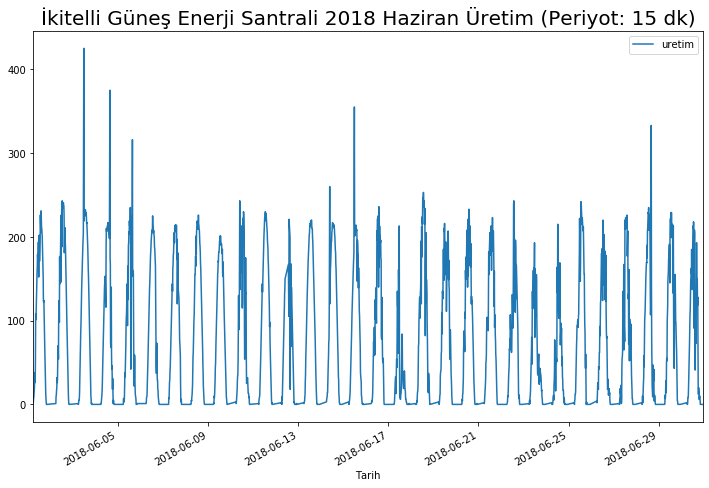

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('İkitelli Güneş Enerji Santrali 2018 Haziran Üretim (Periyot: 15 dk)',fontsize=20)
ax = df.plot.line(x='Tarih',y='uretim',ax=ax)

In [13]:
df['Ay_Gun'] = df.Tarih.dt.day

In [14]:
df.head()

,Tarih,uretim,zaman,Ay_Gun
0,2018-06-01 06:00:00,2.0,06:00:00,1
1,2018-06-01 06:15:00,2.0,06:15:00,1
2,2018-06-01 06:30:00,7.0,06:30:00,1
3,2018-06-01 06:45:00,8.0,06:45:00,1
4,2018-06-01 07:00:00,13.0,07:00:00,1


In [15]:
day_mean_prod = df.groupby('Ay_Gun').uretim.mean().reset_index().rename(columns={'uretim':'Uretim_Day_Mean'})
day_mean_prod

,Ay_Gun,Uretim_Day_Mean
0,1,115.000000
1,2,120.850500
2,3,126.237288
3,4,104.508644
4,5,98.655345
5,6,104.717000
6,7,110.249667
7,8,115.533333
8,9,107.783667
9,10,97.155000


In [16]:
df= df.merge(day_mean_prod,on='Ay_Gun')
df

,Tarih,uretim,zaman,Ay_Gun,Uretim_Day_Mean
0,2018-06-01 06:00:00,2.0,06:00:00,1,115.000000
1,2018-06-01 06:15:00,2.0,06:15:00,1,115.000000
2,2018-06-01 06:30:00,7.0,06:30:00,1,115.000000
3,2018-06-01 06:45:00,8.0,06:45:00,1,115.000000
4,2018-06-01 07:00:00,13.0,07:00:00,1,115.000000
...,...,...,...,...,...
1923,2018-06-30 21:45:00,0.0,21:45:00,30,81.705735
1924,2018-06-30 22:00:00,0.0,22:00:00,30,81.705735
1925,2018-06-30 22:15:00,0.0,22:15:00,30,81.705735
1926,2018-06-30 22:30:00,0.0,22:30:00,30,81.705735


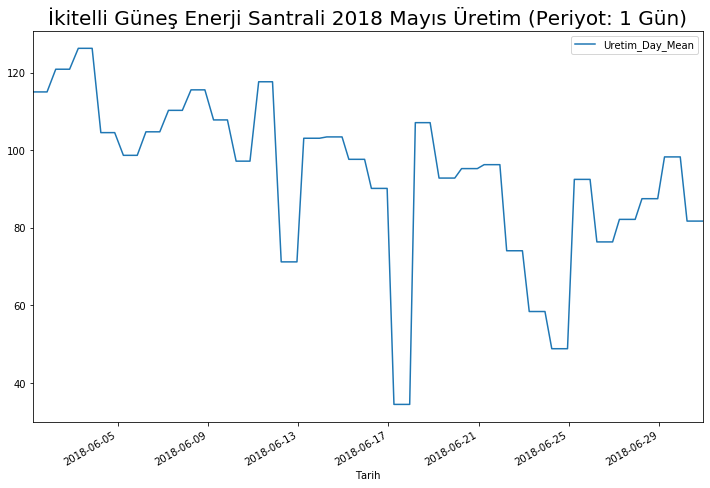

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('İkitelli Güneş Enerji Santrali 2018 Mayıs Üretim (Periyot: 1 Gün)',fontsize=20)
ax = df.plot.line(x='Tarih',y='Uretim_Day_Mean',ax=ax)

In [18]:
df['haftaninGunu'] = df.Tarih.dt.dayofweek
df['hafta'] = df.Tarih.dt.week
df['hafta_2'] = df.Tarih.dt.week -17
df['saat'] = df.Tarih.dt.hour
df['dakika'] = df.Tarih.dt.minute

In [19]:
import datetime

In [20]:
df.head()

,Tarih,uretim,zaman,Ay_Gun,Uretim_Day_Mean,haftaninGunu,hafta,hafta_2,saat,dakika
0,2018-06-01 06:00:00,2.0,06:00:00,1,115.0,4,22,5,6,0
1,2018-06-01 06:15:00,2.0,06:15:00,1,115.0,4,22,5,6,15
2,2018-06-01 06:30:00,7.0,06:30:00,1,115.0,4,22,5,6,30
3,2018-06-01 06:45:00,8.0,06:45:00,1,115.0,4,22,5,6,45
4,2018-06-01 07:00:00,13.0,07:00:00,1,115.0,4,22,5,7,0


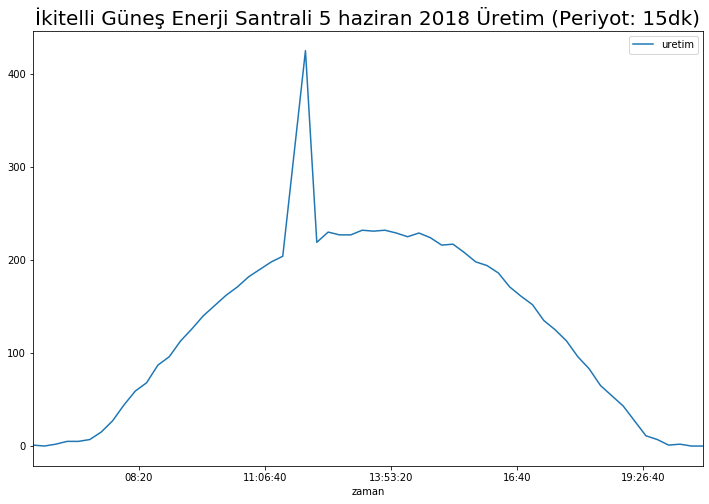

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('İkitelli Güneş Enerji Santrali 5 haziran 2018 Üretim (Periyot: 15dk)',fontsize=20)
ax = df[df.Ay_Gun == df.iloc[df.Uretim_Day_Mean.idxmax()].Ay_Gun].plot.line(x='zaman',y='uretim',ax=ax)

In [25]:
api_key = "e75018aaaa0041cf97e182303202001"
location_list = ["istanbul"]
frequency = 1
start_date = "1-JUN-2018"
end_date = "30-JUN-2018"

In [26]:
hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for istanbul


Currently retrieving data for istanbul: from 2018-06-01 to 2018-06-30
Time elapsed (hh:mm:ss.ms) 0:00:01.334106
Currently retrieving data for istanbul: from 2018-06-01 to 2018-06-30
Time elapsed (hh:mm:ss.ms) 0:00:02.304229


export istanbul completed!




In [27]:
hava_durumu = pd.read_csv('istanbul.csv')

In [28]:
hava_durumu.date_time = pd.to_datetime(hava_durumu.date_time)

In [29]:
hava_durumu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 25 columns):
date_time            1440 non-null datetime64[ns]
maxtempC             1440 non-null int64
mintempC             1440 non-null int64
totalSnow_cm         1440 non-null float64
sunHour              1440 non-null float64
uvIndex              1440 non-null int64
uvIndex.1            1440 non-null int64
moon_illumination    1440 non-null int64
moonrise             1440 non-null object
moonset              1440 non-null object
sunrise              1440 non-null object
sunset               1440 non-null object
DewPointC            1440 non-null int64
FeelsLikeC           1440 non-null int64
HeatIndexC           1440 non-null int64
WindChillC           1440 non-null int64
WindGustKmph         1440 non-null int64
cloudcover           1440 non-null int64
humidity             1440 non-null int64
precipMM             1440 non-null float64
pressure             1440 non-null int64
tempC        

In [30]:
sunny_features = ['date_time','maxtempC','mintempC','sunHour','uvIndex','uvIndex.1','cloudcover','tempC','FeelsLikeC','humidity']

In [31]:
sun_df = hava_durumu[sunny_features]

In [32]:
sun_df.rename(columns={'uvIndex.1':'uvIndex1'},inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [33]:
sun_df['Ay_Gun'] = sun_df.date_time.dt.day
sun_df['saat'] = sun_df.date_time.dt.hour

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
sun_df

,date_time,maxtempC,mintempC,sunHour,uvIndex,uvIndex1,cloudcover,tempC,FeelsLikeC,humidity,Ay_Gun,saat
0,2018-06-01 00:00:00,25,18,14.5,1,1,47,19,19,70,1,0
1,2018-06-01 01:00:00,25,18,14.5,1,1,36,18,19,71,1,1
2,2018-06-01 02:00:00,25,18,14.5,1,1,25,18,19,71,1,2
3,2018-06-01 03:00:00,25,18,14.5,1,1,14,18,19,71,1,3
4,2018-06-01 04:00:00,25,18,14.5,1,1,16,19,20,68,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2018-06-30 19:00:00,26,22,14.5,1,1,45,24,26,69,30,19
1436,2018-06-30 20:00:00,26,22,14.5,1,1,45,24,26,71,30,20
1437,2018-06-30 21:00:00,26,22,14.5,1,1,46,24,25,72,30,21
1438,2018-06-30 22:00:00,26,22,14.5,1,1,45,23,25,74,30,22


In [37]:
full_df = pd.merge(df,sun_df,on=['Ay_Gun','saat'],how='left').drop_duplicates('Tarih').reset_index(drop=True)

In [38]:
full_df.head()

,Tarih,uretim,zaman,Ay_Gun,Uretim_Day_Mean,haftaninGunu,hafta,hafta_2,saat,dakika,date_time,maxtempC,mintempC,sunHour,uvIndex,uvIndex1,cloudcover,tempC,FeelsLikeC,humidity
0,2018-06-01 06:00:00,2.0,06:00:00,1,115.0,4,22,5,6,0,2018-06-01 06:00:00,25,18,14.5,1,1,20,21,21,62
1,2018-06-01 06:15:00,2.0,06:15:00,1,115.0,4,22,5,6,15,2018-06-01 06:00:00,25,18,14.5,1,1,20,21,21,62
2,2018-06-01 06:30:00,7.0,06:30:00,1,115.0,4,22,5,6,30,2018-06-01 06:00:00,25,18,14.5,1,1,20,21,21,62
3,2018-06-01 06:45:00,8.0,06:45:00,1,115.0,4,22,5,6,45,2018-06-01 06:00:00,25,18,14.5,1,1,20,21,21,62
4,2018-06-01 07:00:00,13.0,07:00:00,1,115.0,4,22,5,7,0,2018-06-01 07:00:00,25,18,14.5,1,1,18,22,22,57


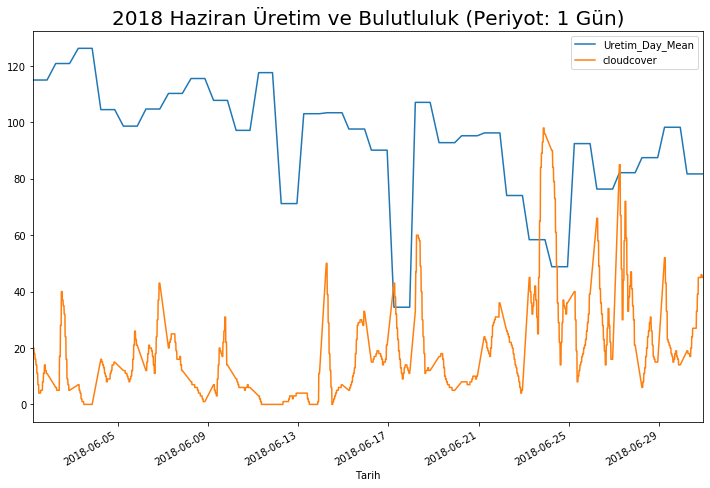

In [40]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('2018 Haziran Üretim ve Bulutluluk (Periyot: 1 Gün)',fontsize=20)
ax = full_df.plot.line(x='Tarih',y=['Uretim_Day_Mean','cloudcover'],ax=ax)

## lgbm 

In [42]:
features = full_df.columns.difference(['Tarih','Uretim_Day_Mean','date_time','zaman','uretim'])
label = 'uretim'

In [43]:
features

Index(['Ay_Gun', 'FeelsLikeC', 'cloudcover', 'dakika', 'hafta', 'hafta_2',
       'haftaninGunu', 'humidity', 'maxtempC', 'mintempC', 'saat', 'sunHour',
       'tempC', 'uvIndex', 'uvIndex1'],
      dtype='object')

In [44]:
X = full_df[features]
y = full_df[label]

In [45]:
train_X,test_X,train_y,test_y = train_test_split(X,y,shuffle=False,test_size=24*4*2)

In [46]:
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((1736, 15), (1736,), (192, 15), (192,))

In [47]:
params = {
    'max_depth':3,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['mape','rmse'],
    'num_leaves': 5,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [48]:
tss = TimeSeriesSplit(n_splits=5)

In [49]:
for fold,(tr_idx,vl_idx) in enumerate(tss.split(train_X)):
    print(f'Splitting {fold+1}')
    tr_x,tr_y = train_X.values[tr_idx],train_y.values[tr_idx]
    vl_x,vl_y = train_X.values[vl_idx],train_y.values[vl_idx]
    
    assert tr_x.shape[0] == tr_y.shape[0]
    assert vl_x.shape[0] == vl_y.shape[0]
    assert tr_x.shape[1] == vl_x.shape[1]
    
    print('Initialize data')
    train = lgb.Dataset(tr_x,tr_y)
    val = lgb.Dataset(vl_x,vl_y,reference=train)
    
    print('Train and Validate')
    model = lgb.train(params,train,valid_sets=val,num_boost_round=1000,verbose_eval=10,early_stopping_rounds=15)

Splitting 1
Initialize data
Train and Validate
Training until validation scores don't improve for 15 rounds
[10]	valid_0's mape: 9.52664	valid_0's rmse: 56.8363
[20]	valid_0's mape: 6.86874	valid_0's rmse: 44.1368
[30]	valid_0's mape: 4.77104	valid_0's rmse: 35.4467
[40]	valid_0's mape: 3.40015	valid_0's rmse: 32.4394
[50]	valid_0's mape: 2.74245	valid_0's rmse: 31.0612
[60]	valid_0's mape: 2.27975	valid_0's rmse: 31.9616
[70]	valid_0's mape: 2.06312	valid_0's rmse: 31.8359
Early stopping, best iteration is:
[55]	valid_0's mape: 2.42943	valid_0's rmse: 30.7499
Splitting 2
Initialize data
Train and Validate
Training until validation scores don't improve for 15 rounds
[10]	valid_0's mape: 14.8058	valid_0's rmse: 60.7409
[20]	valid_0's mape: 10.771	valid_0's rmse: 48.2081
[30]	valid_0's mape: 7.72255	valid_0's rmse: 39.1646
[40]	valid_0's mape: 5.6434	valid_0's rmse: 34.076
[50]	valid_0's mape: 4.46304	valid_0's rmse: 31.6287
[60]	valid_0's mape: 3.64894	valid_0's rmse: 30.3134
[70]	valid

In [50]:
full_train = lgb.Dataset(train_X,train_y)

In [51]:
train_X

,Ay_Gun,FeelsLikeC,cloudcover,dakika,hafta,hafta_2,haftaninGunu,humidity,maxtempC,mintempC,saat,sunHour,tempC,uvIndex,uvIndex1
0,1,21,20,0,22,5,4,62,25,18,6,14.5,21,1,1
1,1,21,20,15,22,5,4,62,25,18,6,14.5,21,1,1
2,1,21,20,30,22,5,4,62,25,18,6,14.5,21,1,1
3,1,21,20,45,22,5,4,62,25,18,6,14.5,21,1,1
4,1,22,18,0,22,5,4,57,25,18,7,14.5,22,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,28,28,8,30,26,9,3,67,27,22,7,14.5,24,1,1
1732,28,28,8,45,26,9,3,67,27,22,7,14.5,24,1,1
1733,28,28,11,0,26,9,3,64,27,22,8,14.5,25,1,1
1734,28,28,11,15,26,9,3,64,27,22,8,14.5,25,1,1


In [52]:
model = lgb.train(params,full_train,num_boost_round=50,verbose_eval=10)

In [53]:
result = pd.DataFrame()

In [55]:
result['Tarih'] = df.iloc[len(train_X):].Tarih.values
result['Predicted'] = model.predict(test_X)
result['Actual'] = test_y.values

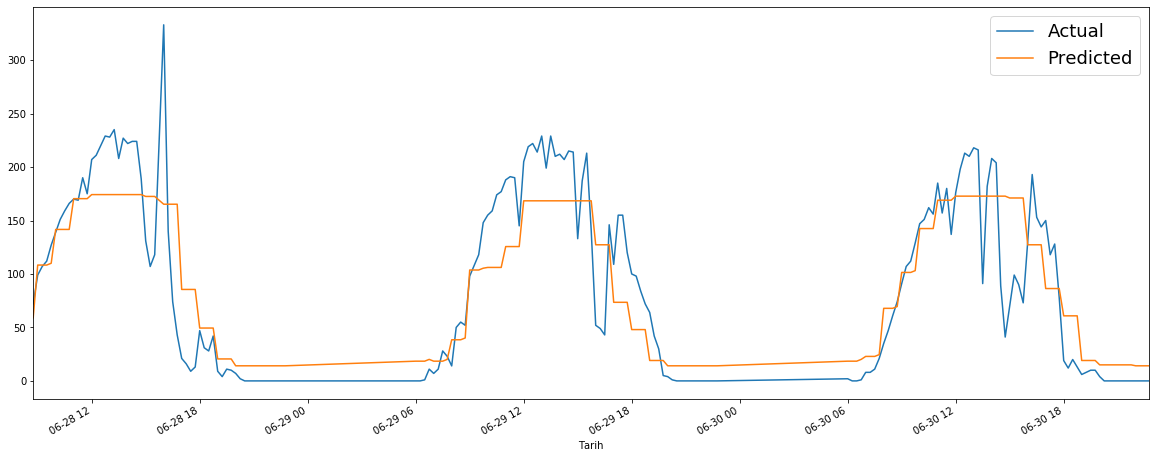

In [57]:
fig, ax = plt.subplots(figsize=(20,8))

result.plot.line(x='Tarih',y=['Actual','Predicted'],ax=ax)
ax.legend(prop=dict(size=18))

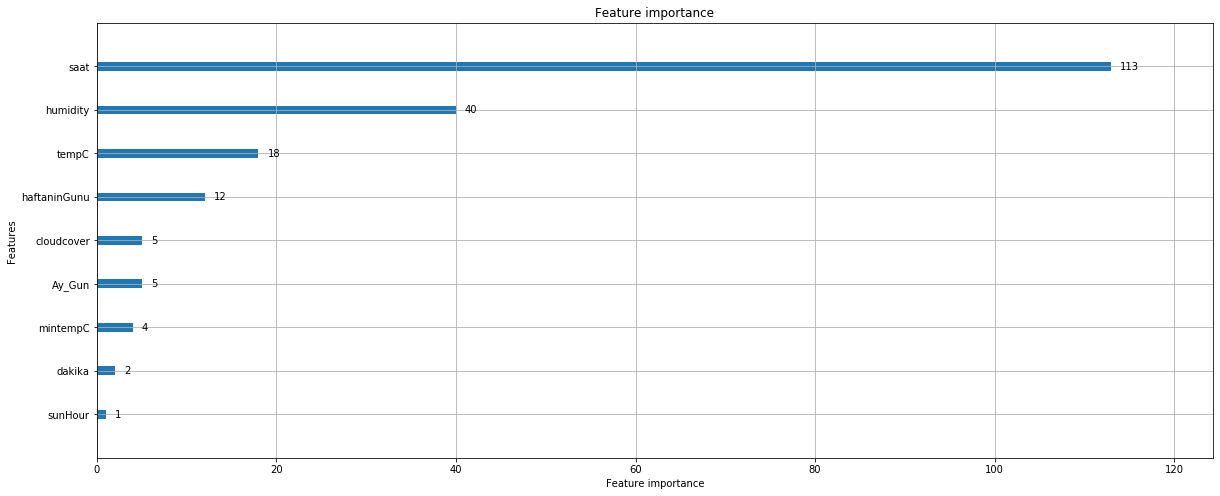

In [58]:
fig, ax = plt.subplots(figsize=(20,8))

lgb.plot_importance(model,ax=ax)